In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[777].shape

(28, 28)

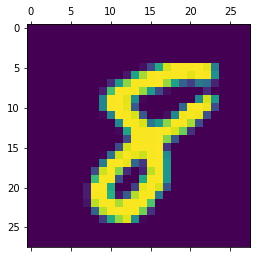

In [8]:
plt.matshow(x_train[777])

In [9]:
y_train[0]

5

###  Reducing the dimensionality 

In [10]:
x_train_flattened = x_train.reshape(len(x_train),28*28)     #numpy.reshape

In [11]:
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [12]:
x_train_flattened.shape

(60000, 784)

In [13]:
x_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7273 - accuracy: 0.8390
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.0991 - accuracy: 0.8781
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.7368 - accuracy: 0.8821
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4962 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4667 - accuracy: 0.8864


# after scaling 

##  x used as X

In [15]:
# dividing x_train and x_test by total number of pixels 
X_train = x_train / 255
X_test = x_test / 255

In [16]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [17]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)



# we can see the improvement in accuracy 

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4634 - accuracy: 0.8795
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2621 - accuracy: 0.9274
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2583 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2557 - accuracy: 0.9292
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2530 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.250

In [19]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 2ms/step - loss: 0.2627 - accuracy: 0.9281


[0.26266607642173767, 0.9280999898910522]

In [20]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 3ms/step


In [21]:
y_predicted[0]

array([4.4101635e-03, 1.5721946e-08, 1.3479189e-02, 9.7402805e-01,
       1.0846743e-03, 1.3962173e-01, 2.9251476e-08, 9.9985290e-01,
       1.0290809e-01, 6.7267621e-01], dtype=float32)

In [22]:
np.argmax(y_predicted[0]) #Returns the indices of the maximum values along an axis.

7

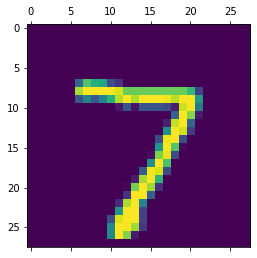

In [23]:
plt.matshow(X_test[0])

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [25]:
y_predicted_labels[0]

7

In [26]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)


Text(69.0, 0.5, 'Truth')

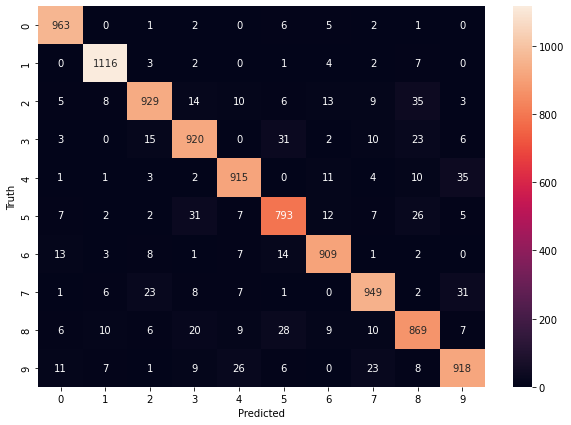

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='relu')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7367 - accuracy: 0.1128
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9328 - accuracy: 0.1608
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0634 - accuracy: 0.1023
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1257 - accuracy: 0.1023
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1436 - accuracy: 0.1023


### activation='relu'

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 0.2733 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1224 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0857 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0643 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0514 - accuracy: 0.9840


In [30]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'mse'])

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2763 - accuracy: 0.9212 - mse: 24.8377
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1283 - accuracy: 0.9615 - mse: 25.3166
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0892 - accuracy: 0.9733 - mse: 25.5540
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0683 - accuracy: 0.9791 - mse: 25.7267
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0538 - accuracy: 0.9835 - mse: 25.8730


In [31]:
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2013 - accuracy: 0.9399
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0810 - accuracy: 0.9755
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0532 - accuracy: 0.9829
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0370 - accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0284 - accuracy: 0.9911


In [32]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9785


[0.07097303122282028, 0.9785000085830688]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

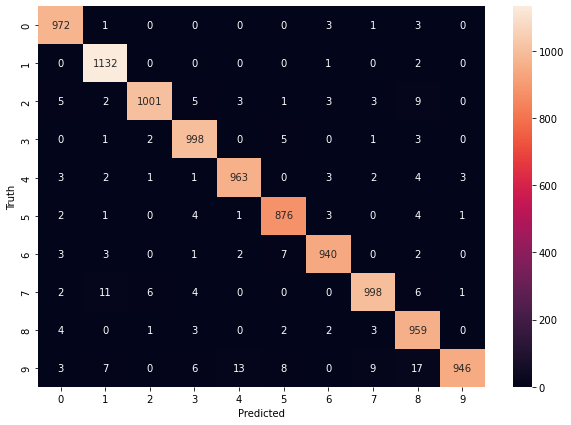

In [33]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2692 - accuracy: 0.9244
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1211 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0868 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0533 - accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0419 - accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0344 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0283 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0226 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.019

###  changing the loss='sparse_categorical_crossentropy' to  loss='SparseCategoricalCrossentropy'

In [35]:
keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0182 - accuracy: 0.9943
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0128 - accuracy: 0.9960
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0104 - accuracy: 0.9968
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - accuracy: 0.9975


In [36]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0965 - accuracy: 0.9770


[0.09651151299476624, 0.9769999980926514]

In [39]:
keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(5, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - accuracy: 0.9972
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0079 - accuracy: 0.9975
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0054 - accuracy: 0.9984


In [ ]:
model.evaluate(X_test,y_test)

In [40]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'mse'])

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2672 - accuracy: 0.9245 - mse: 27.3783
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1213 - accuracy: 0.9634 - mse: 27.3873
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0843 - accuracy: 0.9743 - mse: 27.3893
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0641 - accuracy: 0.9803 - mse: 27.3904
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0500 - accuracy: 0.9843 - mse: 27.3912


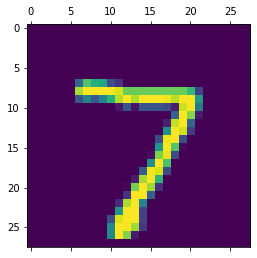

In [41]:
plt.matshow(X_test[0])